In [29]:
# imports
from linescanning import glm, utils, dataset, plotting, preproc
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nb
import numpy as np
import pandas as pd

# warnings.simplefilter('ignore')
opj = os.path.join

In [11]:
func_file = "/data1/projects/MicroFunc/Jurjen/projects/VE-pRF/sub-001/ses-2/func/sub-001_ses-2_task-pRF_run-2_bold.mat"
physio = "/data1/projects/MicroFunc/Jurjen/projects/VE-pRF/sub-001/ses-2/func/sub-001_ses-2_task-pRF_run-2_desc-retroicor_regressors.tsv"
data_obj = dataset.Dataset(func_file,
                           standardization="zscore",
                           use_bids=True,
                           verbose=True)

df_func     = data_obj.fetch_fmri()

DATASET

FUNCTIONAL
Preprocessing /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/sub-001/ses-2/func/sub-001_ses-2_task-pRF_run-2_bold.mat
 Filtering strategy: 'hp'
 Standardization strategy: 'zscore'
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]

DATASET: created
Fetching dataframe from attribute 'df_func_zscore'


In [8]:
df_func.shape

(5200, 720)

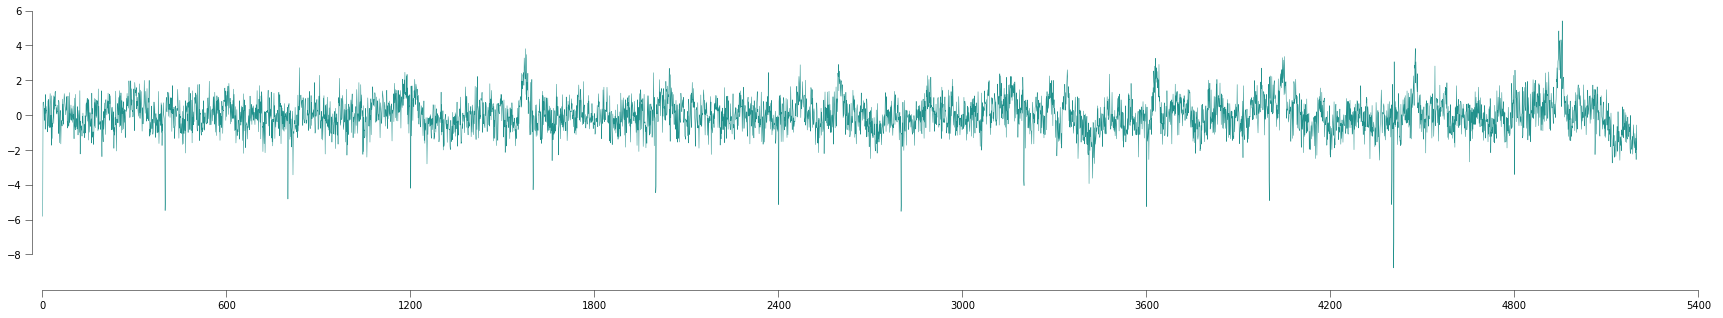

In [10]:
plotting.LazyPlot(df_func['vox 359'].values, line_width=0.5)

In [44]:
physio_df = pd.read_csv(physio, header=None, delimiter='\t')
physio_df.dropna(axis=1, how='any', inplace=True) 
physio_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.693497,0.720460,-0.038124,0.999273,-0.746375,0.665525,0.071344,0.997452,-0.989820,0.142325,-0.212580,-0.977144,0.959487,-0.281752,-0.669147,0.743130,0.768101,-0.640329,-0.010028,-0.047837
1,0.064904,0.997892,-0.991575,0.129533,-0.193617,-0.981077,-0.215761,0.976446,-0.906894,-0.421358,0.607106,-0.794621,0.644915,0.764254,-0.988391,-0.151931,0.960384,-0.278681,-0.010024,-0.047836
2,-0.583636,0.812015,-0.318738,-0.947843,0.955690,0.294375,-0.737555,0.675287,0.087974,-0.996123,0.607783,0.794103,-0.984521,-0.175266,-0.117880,-0.993028,0.978807,-0.204784,-0.010022,-0.047887
3,-0.969842,0.243735,0.881187,-0.472769,-0.739381,0.673287,-0.900538,0.434777,0.621938,-0.783066,-0.219620,0.975585,-0.226385,-0.974038,0.767409,-0.641157,0.979350,0.202172,-0.010024,-0.048022
4,-0.903926,-0.427688,0.634166,0.773197,-0.242553,-0.970138,-0.949607,0.313444,0.803505,-0.595298,-0.576421,0.817153,0.291242,-0.956649,0.992431,0.122805,0.724318,0.689466,-0.010033,-0.048265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,0.908056,0.418848,0.649132,0.760676,0.270840,0.962624,-0.995843,0.091083,0.983408,-0.181408,-0.962797,0.270225,0.934182,-0.356796,-0.942431,-0.334399,-0.866132,-0.499816,0.096651,0.359992
5196,0.254803,0.966993,-0.870151,0.492785,-0.698237,-0.715867,-0.998987,0.044995,0.995951,-0.089899,-0.990897,0.134620,0.983836,-0.179069,-0.298055,-0.954549,-0.211035,-0.977478,0.099700,0.355708
5197,-0.570167,0.821528,-0.349818,-0.936818,0.969077,0.246757,-0.999500,-0.031604,0.998002,0.063176,-0.995507,-0.094685,0.992018,0.126100,0.595846,-0.803099,0.543919,-0.839138,0.102860,0.351379
5198,-0.996548,0.083015,0.986217,-0.165457,-0.969077,0.246757,-0.999699,-0.024538,0.998796,0.049061,-0.997291,-0.073555,0.995186,0.098004,0.998285,-0.058537,0.994211,-0.107443,0.106126,0.347011


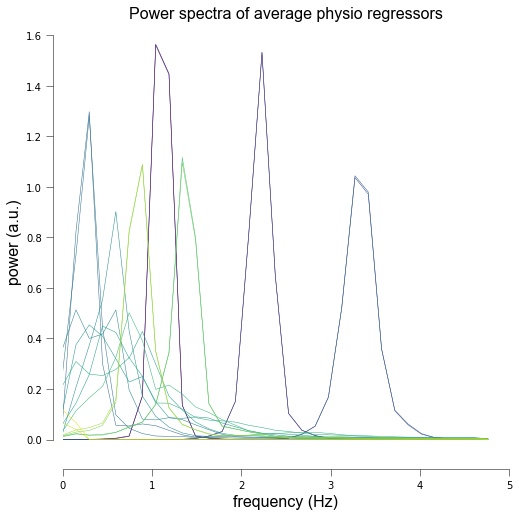

In [51]:
fig,axs = plt.subplots(figsize=(8,8))
cmap = sns.color_palette('viridis', n_colors=physio_df.shape[-1])
for ii in range(physio_df.shape[-1]):
  power = preproc.get_freq(physio_df.iloc[:,ii].values)

  plotting.LazyPlot(power[1],
                    xx=power[0],
                    x_label="frequency (Hz)",
                    y_label="power (a.u.)",
                    title="Power spectra of average physio regressors",
                    axs=axs,
                    font_size=16,
                    color=cmap[ii],
                  #   x_lim=[0, 1.5],
                    line_width=0.5)

In [46]:
# clean dataframe
clean_obj = preproc.RegressOut(df_func, physio_df)
df_clean = clean_obj.clean_df

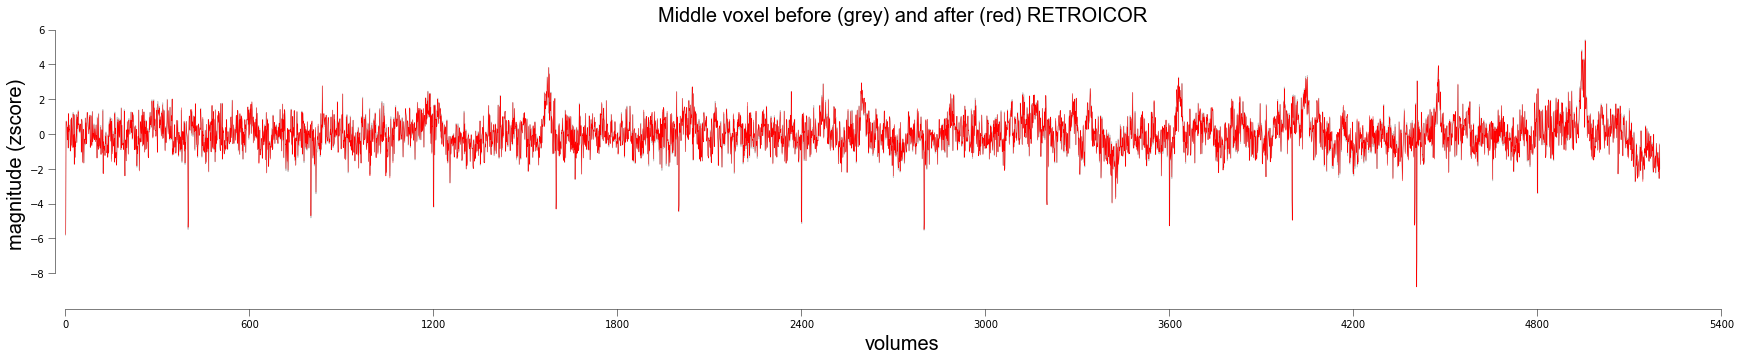

In [56]:
plotting.LazyPlot([df_func['vox 359'].values, df_clean['vox 359'].values], 
                   line_width=[1, 0.5], 
                   color=["#cccccc", "r"],
                   x_label="volumes",
                   y_label="magnitude (zscore)",
                   title="Middle voxel before (grey) and after (red) RETROICOR",
                   font_size=20)

In [48]:
df_func.head()

vox 0     vox 1     vox 2     vox 3     vox 4     vox 5  \
subject run t                                                                   
001     2   0.000 -1.959563 -2.513431 -1.283602  0.023573 -1.677541 -0.323646   
            0.105 -2.113403 -0.296029 -3.429653 -3.468345 -1.187225 -2.268707   
            0.210  0.708187  1.514313 -0.308918 -0.435251 -0.315320 -0.125330   
            0.315 -0.776269  0.263355  2.115366 -0.451565 -1.284823 -0.009725   
            0.420  1.204912 -0.329073 -0.020125 -0.318343  2.993979 -0.315604   

                      vox 6     vox 7     vox 8     vox 9  ...   vox 710  \
subject run t                                              ...             
001     2   0.000 -3.071058 -2.766572 -0.673633 -0.342957  ...  0.314453   
            0.105 -2.809151 -2.817625 -1.489212 -2.150309  ... -0.538824   
            0.210  1.777848  2.481817 -0.294609 -0.202879  ... -0.742931   
            0.315 -0.386461 -0.973319  0.053375  1.009338  ...  0.417886   
            0.420  0.566595  0.263826 -0.661104  3.373623  ... -0.422118   

                    vox 711   vox 712   vox 713   vox 714   vox 715   vox 716  \
subject run t                                                                   
001     2   0.000 -0.540178 -0.189061 -1.416478  0.071146  1.710016  0.685440   
            0.105 -0.160010 -0.410694 -0.456976 -0.000959 -0.653874 -1.365290   
            0.210 -0.142627  0.147415  0.271727  0.138366 -0.213827  0.916777   
            0.315 -0.073425 -0.326793 -2.050636 -1.630258  0.656567  0.102484   
            0.420  0.608613  0.419254 -0.168688  0.414946 -1.235479 -1.814679   

                    vox 717   vox 718   vox 719  
subject run t                                    
001     2   0.000 -0.128060 -0.026893 -0.373331  
            0.105 -0.563727 -0.756810 -0.083225  
            0.210 -0.036619  0.814873 -0.255726  
            0.315  0.588581  0.480699 -0.827416  
            0.420 -0.604414  0.689501  0.977016  

[5 rows x 720 columns]

In [49]:
df_clean.head()

vox 0     vox 1     vox 2     vox 3     vox 4     vox 5  \
subject run t                                                                   
001     2   0.000 -1.996673 -2.515790 -1.314906  0.056370 -1.647525 -0.461479   
            0.105 -2.004893 -0.318760 -3.484016 -3.334833 -1.034947 -2.308387   
            0.210  0.748590  1.434211 -0.260607 -0.345729 -0.321569 -0.080519   
            0.315 -0.818312  0.267690  2.075317 -0.422654 -1.406079 -0.066007   
            0.420  1.179151 -0.264055 -0.099994 -0.278207  2.925319 -0.392747   

                      vox 6     vox 7     vox 8     vox 9  ...   vox 710  \
subject run t                                              ...             
001     2   0.000 -3.191283 -2.777200 -0.796281 -0.336667  ...  0.344780   
            0.105 -2.968847 -2.814437 -1.551102 -2.081157  ... -0.539046   
            0.210  1.663087  2.500903 -0.280453 -0.242433  ... -0.688567   
            0.315 -0.434986 -1.022118  0.048989  0.894235  ...  0.402393   
            0.420  0.568327  0.232759 -0.645527  3.287581  ... -0.458457   

                    vox 711   vox 712   vox 713   vox 714   vox 715   vox 716  \
subject run t                                                                   
001     2   0.000 -0.400336 -0.302577 -1.419069  0.039624  1.741114  0.738851   
            0.105 -0.071622 -0.451169 -0.513973  0.001916 -0.651942 -1.353622   
            0.210 -0.150824  0.149602  0.265340  0.185713 -0.237153  0.861274   
            0.315 -0.155612 -0.322280 -1.990250 -1.702168  0.643619  0.054364   
            0.420  0.541616  0.514026 -0.056472  0.271581 -1.246630 -1.819698   

                    vox 717   vox 718   vox 719  
subject run t                                    
001     2   0.000 -0.228554 -0.010287 -0.403697  
            0.105 -0.640201 -0.718039 -0.059496  
            0.210 -0.047862  0.801543 -0.313499  
            0.315  0.605619  0.441001 -0.870161  
            0.420 -0.615206  0.714086  1.050872  

[5 rows x 720 columns]